Business Scenario: Email Spam Detection for a Startup

A startup company is building a basic email filtering system to classify emails as:

1 → Spam

0 → Not Spam

The company wants to first implement a simple Perceptron model before moving to complex neural networks.
They identified two key binary features from emails:

1.Contains Suspicious Keywords (e.g., “lottery”, “prize”, “urgent”)

Yes → 1

No → 0

2.Sender is Unknown

Yes → 1

No → 0

So each email is represented as:
X=(x1,x2)
x1=suspicious keywords, x2=unknown sender

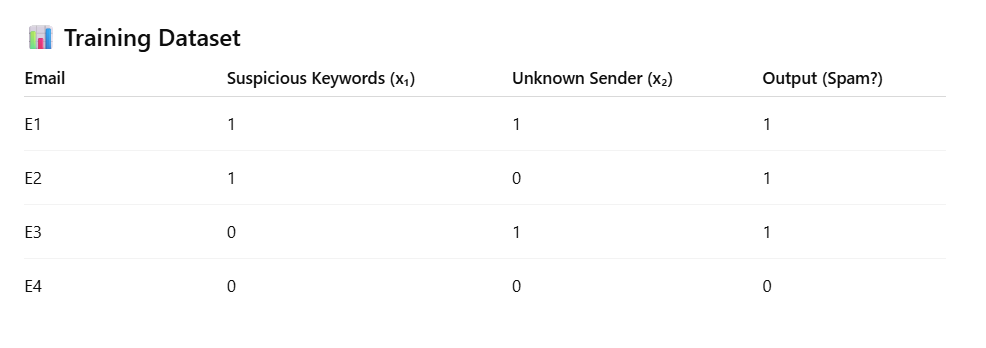

In [ ]:
import numpy as np

X=np.array([[1,1],[1,0],[0,1],[0,0]])
y=np.array([1,1,1,0])

**Part 1 – Conceptual Understanding**

Is this dataset linearly separable?

Can a single-layer Perceptron solve this problem?

What logical function does this resemble?

The dataset is linearly separable because a single straight line can separate (0,0) from the other three points. Therefore, a single-layer Perceptron can successfully learn and classify the data. This problem resembles the OR logical function, where the output is 1 if at least one input is 1.

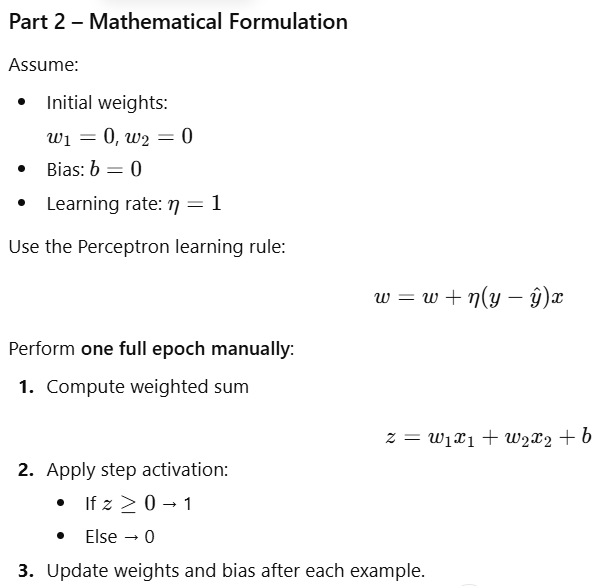

In [ ]:
w=np.zeros(2)
b=0.0
learning_rate=0.1
epochs=10

print("Initial Weight : ",w)
print("Initial Bias : ",b)

Initial Weight :  [0. 0.]
Initial Bias :  0.0


In [ ]:
def step_function(z):
  return 1 if z>=0 else 0

In [ ]:
for epoch in range(epochs):
  print(f"Epoch : {epoch}")
  for i in range(len(X)):
    # 1.computer weight
    z=np.dot(w,X[i])+b
    # 2.apply Activation function
    y_pred=step_function(z)
    # 3.Compute error
    error=y[i]-y_pred
    # 4.Update weight
    w=w+learning_rate*error*X[i]
    # 5.Update bias
    b=b+learning_rate*error

    print(f"  Input : {X[i]},Actual value : {y[i]},Predicted value : {y_pred},Error : {error},Updated Weight : {w},Updated Bias : {b}")

Epoch : 0
  Input : [1 1],Actual value : 1,Predicted value : 1,Error : 0,Updated Weight : [0. 0.],Updated Bias : 0.0
  Input : [1 0],Actual value : 1,Predicted value : 1,Error : 0,Updated Weight : [0. 0.],Updated Bias : 0.0
  Input : [0 1],Actual value : 1,Predicted value : 1,Error : 0,Updated Weight : [0. 0.],Updated Bias : 0.0
  Input : [0 0],Actual value : 0,Predicted value : 1,Error : -1,Updated Weight : [0. 0.],Updated Bias : -0.1
Epoch : 1
  Input : [1 1],Actual value : 1,Predicted value : 0,Error : 1,Updated Weight : [0.1 0.1],Updated Bias : 0.0
  Input : [1 0],Actual value : 1,Predicted value : 1,Error : 0,Updated Weight : [0.1 0.1],Updated Bias : 0.0
  Input : [0 1],Actual value : 1,Predicted value : 1,Error : 0,Updated Weight : [0.1 0.1],Updated Bias : 0.0
  Input : [0 0],Actual value : 0,Predicted value : 1,Error : -1,Updated Weight : [0.1 0.1],Updated Bias : -0.1
Epoch : 2
  Input : [1 1],Actual value : 1,Predicted value : 1,Error : 0,Updated Weight : [0.1 0.1],Updated Bias

In [ ]:
print("Final Weight : ",w)
print("Final Bias : ",b)

Final Weight :  [0.1 0.1]
Final Bias :  -0.1


**Part 3 – Decision Boundary**

After training:

Write the final equation of the decision boundary.

Plot the decision boundary.

Explain geometrically how Perceptron separates spam and non-spam emails.

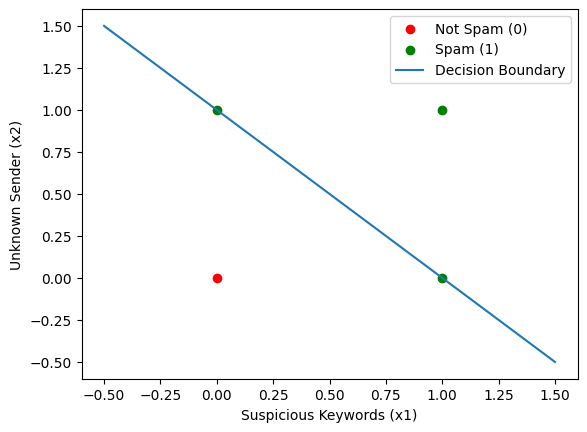

In [ ]:
import matplotlib.pyplot as plt

for i in range(len(X)):
    if y[i] == 0:
        plt.scatter(X[i][0], X[i][1], color='red')
    else:
        plt.scatter(X[i][0], X[i][1], color='green')

plt.scatter([], [], color='red', label="Not Spam (0)")
plt.scatter([], [], color='green', label="Spam (1)")
x_values = np.linspace(-0.5, 1.5, 100)
y_values = -(w[0]*x_values + b) / w[1]
plt.plot(x_values, y_values, label="Decision Boundary")
plt.xlabel("Suspicious Keywords (x1)")
plt.ylabel("Unknown Sender (x2)")
plt.legend()
plt.show()

The perceptron draws a straight line that separates (0,0) from the other three points.
Emails with at least one risky feature lie on one side (Spam), and safe emails lie on the other side (Not Spam).

**Part 4 – Critical Thinking**

What happens if we change E3 output to 0?

Will Perceptron still converge?

If not, why?

What limitation of Perceptron does this expose?

**What if E3 output changes to 0?**

New dataset:

x1	x2	Output

1	1	1

1	0	1

0	1	0

0	0	0

**Will Perceptron still converge?**

Yes
This dataset is still linearly separable.

**If not linearly separable, what happens?**

If dataset becomes non-linearly separable (like XOR), perceptron will:

Keep updating weights

Never converge